# Experimenting with Normal distribution Probability Density Function
(Learning the scipy api for normal distribution)

In [10]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mean, var, skew, kurt = stats.norm.stats(moments='mvsk')

In [4]:
mean

array(0.)

In [5]:
var

array(1.)

In [6]:
skew

array(0.)

In [7]:
kurt

array(0.)

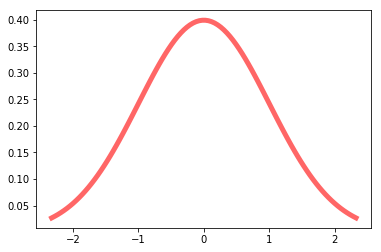

In [11]:
fig,ax = plt.subplots()

x = np.linspace(stats.norm.ppf(0.01),
                stats.norm.ppf(0.99), 100)
ax.plot(x, stats.norm.pdf(x),
        'r-', lw=5, alpha=0.6, label='norm pdf')

## Freeze the distribution and display the frozen pdf:

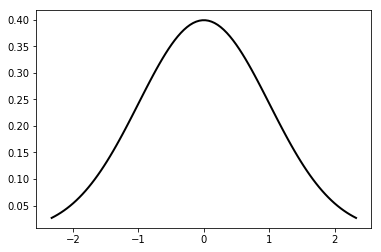

In [14]:
fig,ax = plt.subplots()
rv = stats.norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

## Generate random numbers:

In [36]:
r = stats.norm.rvs(size=1000)

No handles with labels found to put in legend.


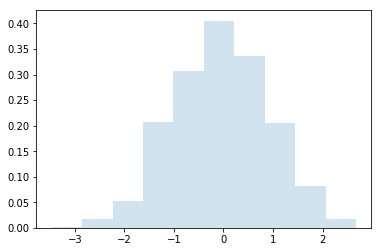

In [37]:
fig,ax = plt.subplots()
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)

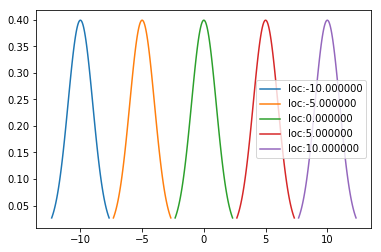

In [26]:
fig,ax = plt.subplots()
N = 5
locs = np.linspace(-10,10,N)
scale = 1
for loc in locs:
    
    rv = stats.norm(loc=loc, scale = scale)
    
    x_ = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)
    
    densities = rv.pdf(x_)
    
    ax.plot(x_, densities, label='loc:%f' % loc)
ax.legend()

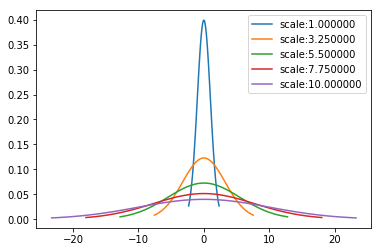

In [28]:
fig,ax = plt.subplots()
N = 5
loc = 0
scales = np.linspace(1,10,N)
for scale in scales:
    
    rv = stats.norm(loc=loc, scale = scale)
    
    x_ = np.linspace(rv.ppf(0.01),
                rv.ppf(0.99), 100)
    
    densities = rv.pdf(x_)
    
    ax.plot(x_, densities, label='scale:%f' % scale)
ax.legend()

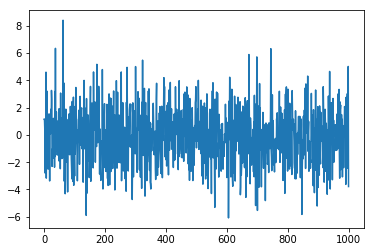

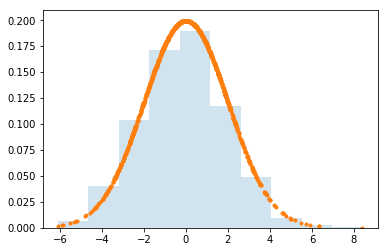

In [60]:
N = 1000
loc = 0
scale = 2
ϵ = stats.norm.rvs(size=N, loc = loc, scale = scale)
y = ϵ 

density = stats.norm.pdf(y, loc=loc, scale=scale)

fig,ax = plt.subplots()
ax.plot(y)

fig,ax = plt.subplots()
ax.hist(y, density=True, histtype='stepfilled', alpha=0.2);
ax.plot(y,density,'.')


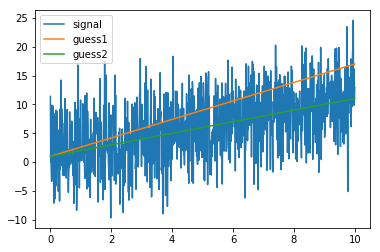

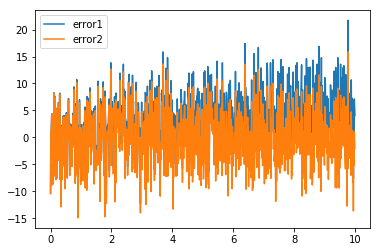

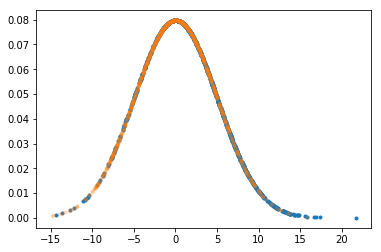

In [153]:
def function(a,b,x):
    return a+b*x


N = 1000
loc = 0
scale = 5
ϵ = stats.norm.rvs(size=N, loc = loc, scale = scale)
error_distribution = stats.norm(loc=loc, scale = scale)
a = 1
b = 1
x = np.linspace(0,10,N)
y_function = function(a,b,x)
y = y_function + ϵ 


# Wrong guess:
a1 = a
b1 = b*1.6
y_function_guess1 = function(a1,b1,x)
error1 = y_function_guess1 - y

# Correct guess
a2 = a
b2 = b
y_function_guess2 = function(a2,b2,x)
error2 = y_function_guess2 - y



fig,ax = plt.subplots()
ax.plot(x,y, label='signal')
ax.plot(x,y_function_guess1, label='guess1')
ax.plot(x,y_function_guess2, label='guess2')
ax.legend()

fig,ax = plt.subplots()
ax.plot(x,error1, label='error1')
ax.plot(x,error2, label='error2')
ax.legend()

fig,ax = plt.subplots()
pdf1 = error_distribution.pdf(error1)
pdf2 = error_distribution.pdf(error2)
ax.plot(error1,pdf1, '.', label='error1', alpha=1)
ax.plot(error2,pdf2, '.', label='error2', alpha=0.2)


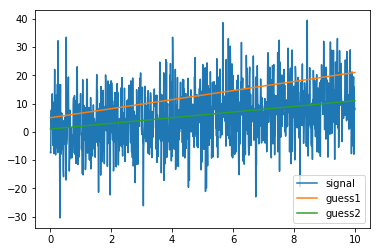

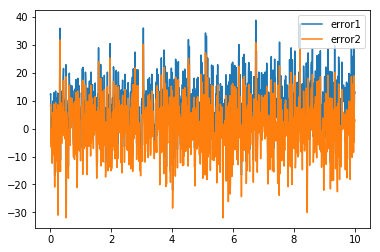

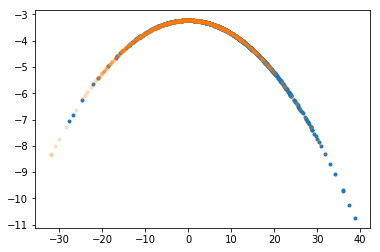

In [154]:
def function(a,b,x):
    return a+b*x


N = 1000
loc = 0
scale = 10
ϵ = stats.norm.rvs(size=N, loc = loc, scale = scale)
error_distribution = stats.norm(loc=loc, scale = scale)
a = 1
b = 1
x = np.linspace(0,10,N)
y_function = function(a,b,x)
y = y_function + ϵ 


# Wrong guess:
a1 = a*5
b1 = b*1.6
y_function_guess1 = function(a1,b1,x)
error1 = y_function_guess1 - y

# Correct guess
a2 = a
b2 = b
y_function_guess2 = function(a2,b2,x)
error2 = y_function_guess2 - y



fig,ax = plt.subplots()
ax.plot(x,y, label='signal')
ax.plot(x,y_function_guess1, label='guess1')
ax.plot(x,y_function_guess2, label='guess2')
ax.legend()

fig,ax = plt.subplots()
ax.plot(x,error1, label='error1')
ax.plot(x,error2, label='error2')
ax.legend()

fig,ax = plt.subplots()
pdf1 = error_distribution.logpdf(error1)
pdf2 = error_distribution.logpdf(error2)
ax.plot(error1,pdf1, '.', label='error1', alpha=1)
ax.plot(error2,pdf2, '.', label='error2', alpha=0.2)

## Calculate the probability of the predictions
As the the sum of the log probability density function as function of the predicted values.

The largest absolute value of this sum, is the most likely prediction

In [159]:
sum(error_distribution.logpdf(error1))

-3998.344191381686

In [160]:
sum(error_distribution.logpdf(error2))

-3709.537029956414